In [23]:
import pandas as pd
import seaborn as sns



buffalo_lead = pd.read_csv('data/buffalo_lead_less27.csv')

buffalo_lead.dropna(inplace=True)
buffalo_lead['lead_danger'] = [False if x < 5 else True for x in buffalo_lead['lead_ppb']]
buffalo_lead.columns

Index(['Unnamed: 0', 'the_geom', 'cartodb_id', 'year', 'lead_ppb', 'address',
       'zipcode', 'latitude', 'longitude', 'Prop_Num_str', 'PropStreet',
       'numstreet', 'citystatezip', 'city', 'latitude_r', 'longitude_r',
       'state', 'street', 'taxAssessment', 'yearBuilt', 'zipcode_r',
       'lead_danger'],
      dtype='object')

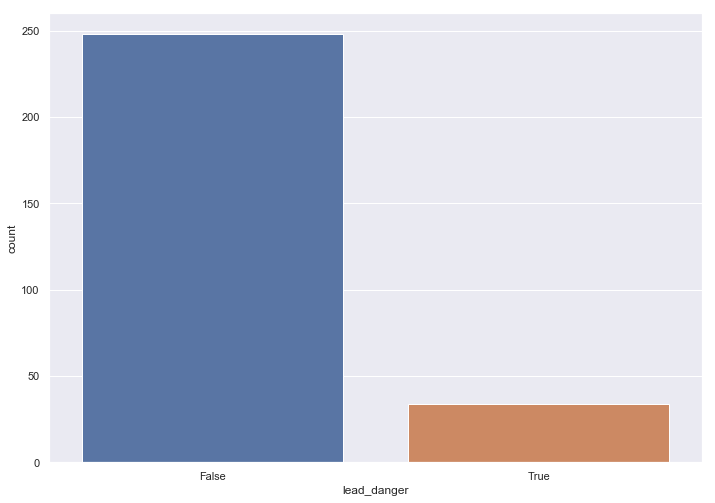

In [32]:
p = sns.countplot(data=buffalo_lead, x= 'lead_danger')

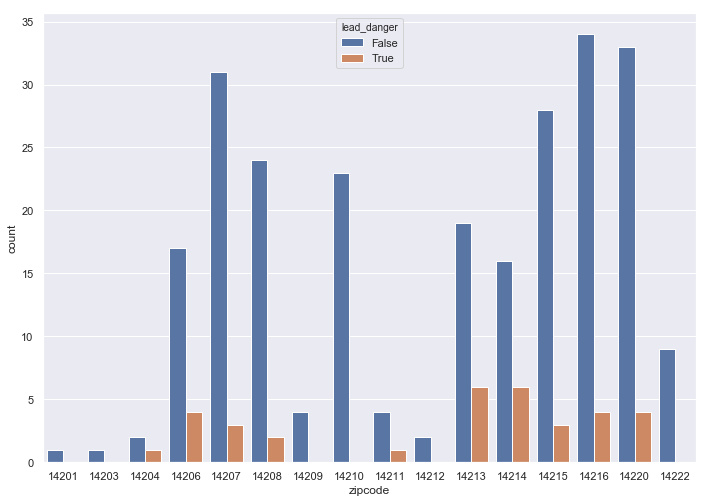

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x='zipcode', hue='lead_danger', data=buffalo_lead)

C:\Users\gushi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


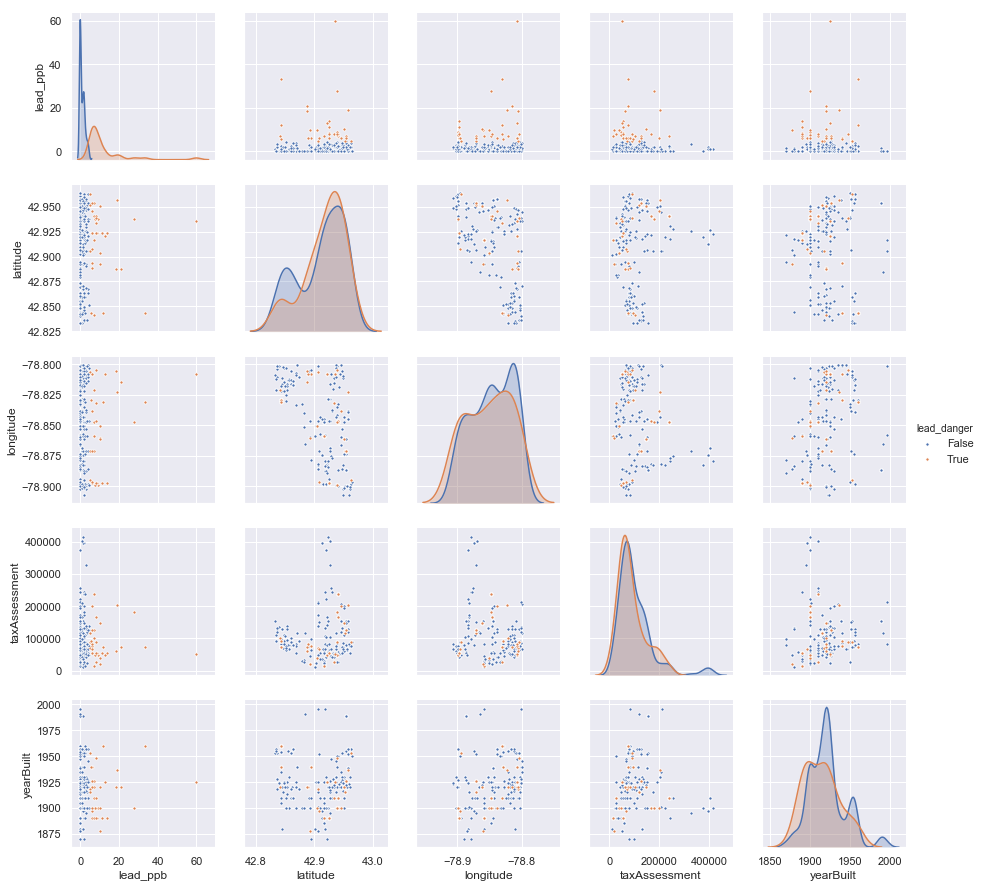

In [25]:
excluded = ('Unnamed: 0', 'the_geom', 'cartodb_id', 'year', 'address',
       'zipcode', 'Prop_Num_str', 'PropStreet',
       'numstreet', 'citystatezip', 'city', 'latitude_r', 'longitude_r',
       'state', 'street', 'zipcode_r', 'lead_danger')

data_columns = [label for label in list(buffalo_lead.columns) if label not in excluded]
sns.pairplot(buffalo_lead, hue = 'lead_danger', vars = data_columns, diag_kind = 'kde', plot_kws = {'s':10})

In [26]:
import sklearn
from sklearn.model_selection import train_test_split

buffalo_lead.columns

data_columns = ['zipcode', 'latitude', 'longitude', 'yearBuilt', 'taxAssessment']
target_column = ['lead_danger']

X = buffalo_lead[data_columns]
y = buffalo_lead[target_column]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)



In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

clf = GradientBoostingClassifier()
scores = cross_val_score(clf, X_train, y_train, scoring='f1', cv = 5)
scores

C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([0.25, 0.  , 0.5 , 0.5 , 0.25])